# An√°lisis y Predicci√≥n del mercado inmobiliario

***Adrian Dumitru Chitic***

* ### Introducci√≥n
En este proyecto se aplica tecnicas de miner√≠a de datos para el an√°lisis del mercado inmobiliario con el objetivo de predecir el precio de las viviendas en funci√≥n de sus caracter√≠sticas

### Carga inicial de los datos
Cargamos los archivos test y train conseguidos desde la plataforma Kaggle, usaremos pandas para trabajar en el formato Dataframe

In [15]:
# Cargamos las librer√≠as b√°sicas
import pandas as pd
import numpy as np

# Cargamos los datasets de entrenamiento y testeo
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Tama√±o y tipos de datos
Comprobamos las variables de los dataset y los tipos de datos mas relevantes

In [17]:
# Dimensiones del dataset
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Tipos de datos
train_df.dtypes.value_counts()

Train shape: (1460, 81)
Test shape: (1459, 80)


object     43
int64      35
float64     3
Name: count, dtype: int64

### Identificaci√≥n de columnas con valores faltantes

In [19]:
# Revisar cu√°ntos valores nulos hay por columna en train
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Mostramos las primeras 15 columnas con m√°s nulos
missing.head(15)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
dtype: int64

### Limpieza de celdas con valores faltantes

In [21]:
cols_fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure'
]
for col in cols_fill_none:
    train_df[col] = train_df[col].fillna('None')

# 2. Rellenamos variables num√©ricas con 0 cuando el valor nulo indica que la caracter√≠stica no existe
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)

# 3. Imputamos LotFrontage con la mediana de su barrio (Neighborhood)
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# 4. Verificamos que no queden valores nulos tras la imputaci√≥n
missing_after = train_df.isnull().sum()
missing_after = missing_after[missing_after > 0]

print("Columnas a√∫n con nulos tras limpieza:", missing_after)

Columnas a√∫n con nulos tras limpieza: MasVnrArea     8
BsmtQual      37
BsmtCond      37
Electrical     1
dtype: int64


In [22]:
# Rellenamos MasVnrArea con 0 si no hay mamposter√≠a
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

# Rellenamos BsmtQual y BsmtCond con 'None'
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('None')
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('None')

# Rellenamos Electrical con el valor m√°s frecuente (moda)
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

# Verificaci√≥n final
print("¬øQuedan nulos?", train_df.isnull().sum().sum())


¬øQuedan nulos? 0


### An√°lisis de la variable "SalePrice" que es nuestra variable que refleja el precio de la vivienda

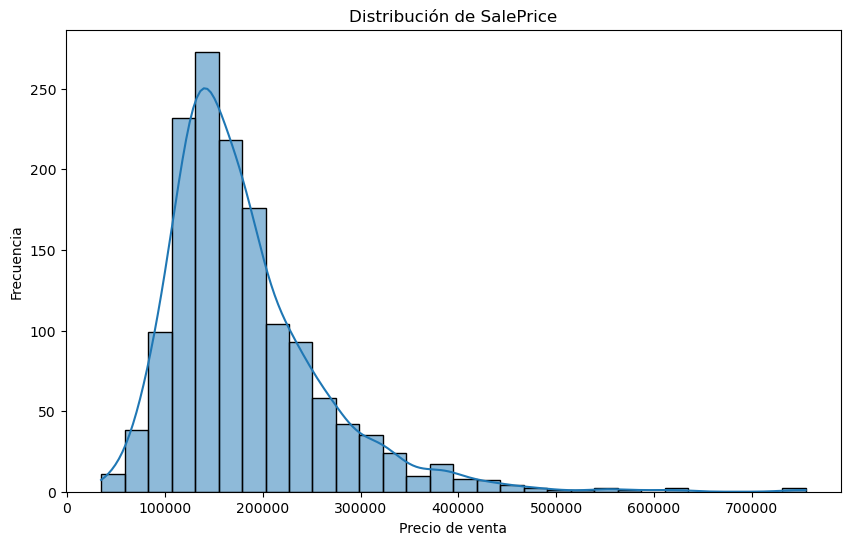

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable objetivo
plt.figure(figsize=(10,6))
sns.histplot(train_df['SalePrice'], kde=True, bins=30)
plt.title('Distribuci√≥n de SalePrice')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.show()

# Estad√≠sticas b√°sicas
print(train_df['SalePrice'].describe())


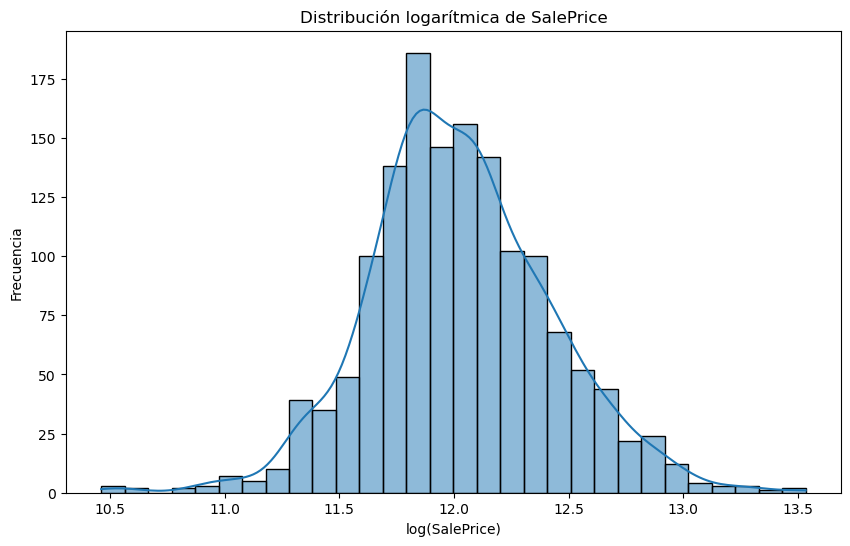

In [25]:
# Transformaci√≥n logar√≠tmica de la variable objetivo
train_df['LogSalePrice'] = np.log1p(train_df['SalePrice'])

# Visualizamos la distribuci√≥n logar√≠tmica
plt.figure(figsize=(10,6))
sns.histplot(train_df['LogSalePrice'], kde=True, bins=30)
plt.title('Distribuci√≥n logar√≠tmica de SalePrice')
plt.xlabel('log(SalePrice)')
plt.ylabel('Frecuencia')
plt.show()


### Correlaciones
Calculamos la correlaci√≥n de las variables con "LogSalePrice" para identificar cuales son las que mas tienen mas impacto, viendo cuales son las claves

Top 10 variables m√°s correlacionadas con LogSalePrice:
SalePrice       0.948374
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: LogSalePrice, dtype: float64


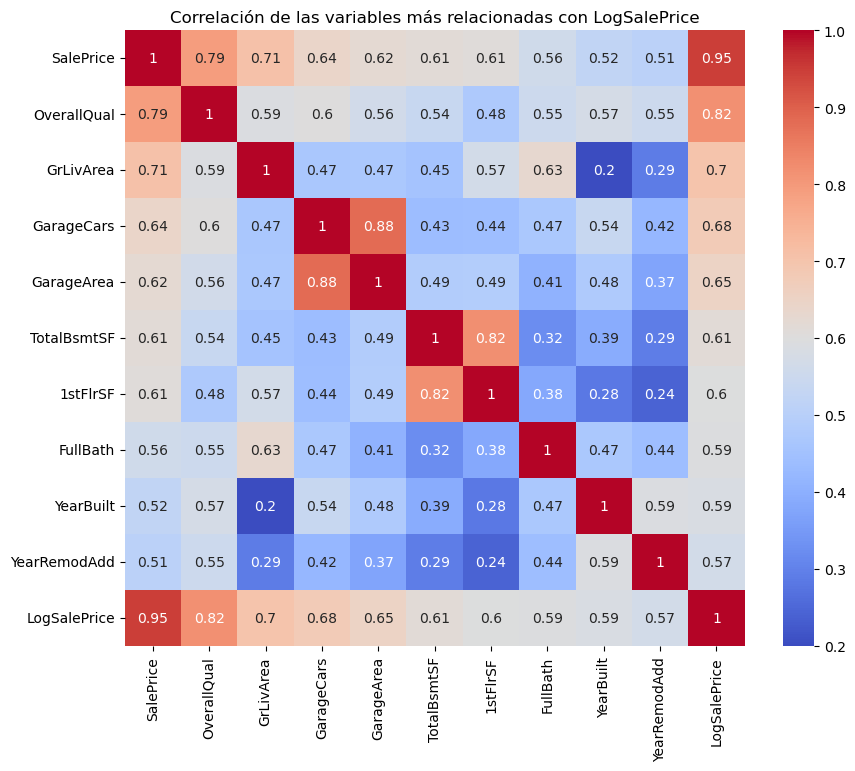

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filtramos las columnas num√©ricas
numeric_features = train_df.select_dtypes(include=[np.number])

# 2. Correlaci√≥n con LogSalePrice
correlation_matrix = numeric_features.corr()
correlations = correlation_matrix['LogSalePrice'].sort_values(ascending=False)

# 3. Top 10 variables m√°s correlacionadas (excluyendo LogSalePrice)
top_corr = correlations.drop('LogSalePrice').head(10)
print("Top 10 variables m√°s correlacionadas con LogSalePrice:")
print(top_corr)

# 4. Visualizaci√≥n en heatmap
top_features = top_corr.index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[top_features + ['LogSalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlaci√≥n de las variables m√°s relacionadas con LogSalePrice')
plt.show()


### Entrenamiento del modelo
Vamos a entrenar el modelo con las variables mas correlacionadas y evaluamos el rendimiento usando RMSE tanto en escala logaritmica como escala real 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# ‚úÖ 1. Definimos las variables predictoras
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars',
    'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'
]

# ‚úÖ 2. Definimos X e y
X = train_df[selected_features]
y = train_df['LogSalePrice']

# ‚úÖ 3. Dividimos en train y validaci√≥n
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 4. Entrenamos el modelo de regresi√≥n lineal
model = LinearRegression()
model.fit(X_train, y_train)

# ‚úÖ 5. Predicciones y evaluaci√≥n
y_pred = model.predict(X_val)

# Error en escala log
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE (log): {rmse:.4f}')

# Error transformado a escala real
rmse_real = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))
print(f'RMSE (escala real): {rmse_real:.2f} d√≥lares')


RMSE (log): 0.1710
RMSE (escala real): 31800.42 d√≥lares


### üå≤ Modelo Avanzado: Random Forest Regressor  
Entrenamos un modelo Random Forest usando variables num√©ricas clave y variables categ√≥ricas como `Neighborhood`, `ExterQual`, `KitchenQual` y `BsmtQual`. Aplicamos one-hot encoding para que puedan ser utilizadas por el modelo. Evaluamos el rendimiento con RMSE en escala log y real.


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# üî¢ 1. Variables num√©ricas + categ√≥ricas
num_features = [
    'OverallQual', 'GrLivArea', 'GarageCars',
    'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'
]
cat_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']

# üîÅ 2. One-Hot Encoding de las categ√≥ricas
X_cat = pd.get_dummies(train_df[cat_features], drop_first=True)

# üß± 3. Concatenamos num√©ricas + categ√≥ricas
X_full = pd.concat([train_df[num_features], X_cat], axis=1)
y_full = train_df['LogSalePrice']

# ‚úÇÔ∏è 4. Divisi√≥n en train y test
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# üå≤ 5. Entrenamiento del modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# üìà 6. Predicciones y evaluaci√≥n
y_pred_rf = rf.predict(X_val)

rmse_log_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
rmse_real_rf = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred_rf)))

print(f'RMSE (log) Random Forest: {rmse_log_rf:.4f}')
print(f'RMSE (escala real) Random Forest: {rmse_real_rf:.2f} d√≥lares')


RMSE (log) Random Forest: 0.1568
RMSE (escala real) Random Forest: 28089.73 d√≥lares


Variables mas importantes:

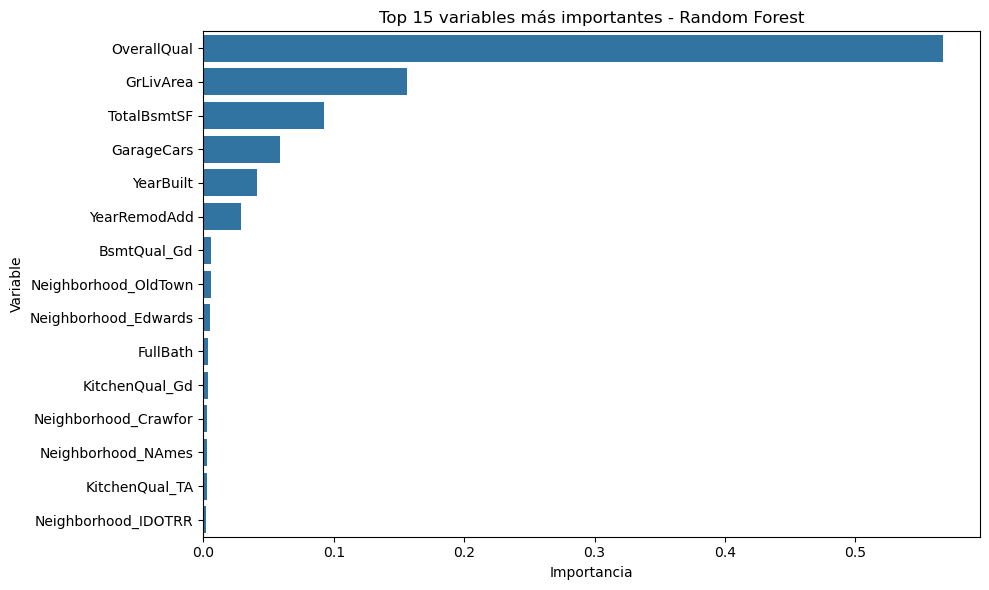

In [33]:
# Importancia de variables en el Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer importancias
importances = rf.feature_importances_
feature_names = X_full.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Mostrar las top 15
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index)
plt.title('Top 15 variables m√°s importantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


### Modelo Random Forest V2 ‚Äì con m√°s variables predictivas 

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ‚úÖ 1. Variables num√©ricas (originales + nuevas)
num_features_v2 = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'TotRmsAbvGrd'
]

# ‚úÖ 2. Variables categ√≥ricas (originales + nuevas)
cat_features_v2 = [
    'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual',
    'GarageFinish', 'BsmtExposure', 'BsmtFinType1'
]

# üß± 3. Codificamos las categ√≥ricas con One-Hot Encoding
X_cat_v2 = pd.get_dummies(train_df[cat_features_v2], drop_first=True)

# üîÄ 4. Concatenamos num√©ricas + categ√≥ricas
X_v2 = pd.concat([train_df[num_features_v2], X_cat_v2], axis=1)
y_v2 = train_df['LogSalePrice']

# ‚úÇÔ∏è 5. Divisi√≥n en train y validaci√≥n
X_train_v2, X_val_v2, y_train_v2, y_val_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)

# üå≤ 6. Entrenamos modelo Random Forest v2
rf_v2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_v2.fit(X_train_v2, y_train_v2)

# üìà 7. Predicciones y evaluaci√≥n
y_pred_v2 = rf_v2.predict(X_val_v2)

rmse_log_v2 = np.sqrt(mean_squared_error(y_val_v2, y_pred_v2))
rmse_real_v2 = np.sqrt(mean_squared_error(np.expm1(y_val_v2), np.expm1(y_pred_v2)))

print(f'RMSE (log) RF v2: {rmse_log_v2:.4f}')
print(f'RMSE (escala real) RF v2: {rmse_real_v2:.2f} d√≥lares')


RMSE (log) RF v2: 0.1540
RMSE (escala real) RF v2: 27654.16 d√≥lares


### Comparamos con el Modelo XGBoost

In [37]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 1. Usamos las mismas features de la versi√≥n RF v2
X = X_v2  # Ya est√° construido con num√©ricas + dummies categ√≥ricas
y = y_v2  # Target en escala log

# 2. Divisi√≥n en train y validaci√≥n
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenamos el modelo XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# 4. Predicciones y evaluaci√≥n
y_pred_xgb = xgb_model.predict(X_val_xgb)

rmse_log_xgb = np.sqrt(mean_squared_error(y_val_xgb, y_pred_xgb))
rmse_real_xgb = np.sqrt(mean_squared_error(np.expm1(y_val_xgb), np.expm1(y_pred_xgb)))

print(f'RMSE (log) XGBoost: {rmse_log_xgb:.4f}')
print(f'RMSE (escala real) XGBoost: {rmse_real_xgb:.2f} d√≥lares')


RMSE (log) XGBoost: 0.1512
RMSE (escala real) XGBoost: 26295.15 d√≥lares


### üß™ Tuning de hiperpar√°metros con RandomizedSearchCV  
Aplicamos `RandomizedSearchCV` para ajustar autom√°ticamente los hiperpar√°metros de XGBoost y mejorar el rendimiento. Exploramos 20 combinaciones distintas en una b√∫squeda aleatoria con validaci√≥n cruzada (CV=3).


In [39]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

# 1. Definimos el modelo base
xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# 2. Espacio de hiperpar√°metros a explorar
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# 3. Configuramos la b√∫squeda aleatoria
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,  # N√∫mero de combinaciones a probar
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Entrenamos sobre el mismo set
random_search.fit(X_train_xgb, y_train_xgb)

# 5. Resultados
print("Mejores hiperpar√°metros encontrados:")
print(random_search.best_params_)

# 6. Evaluamos el mejor modelo en el conjunto de validaci√≥n
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_val_xgb)

rmse_log_best = np.sqrt(mean_squared_error(y_val_xgb, y_pred_best))
rmse_real_best = np.sqrt(mean_squared_error(np.expm1(y_val_xgb), np.expm1(y_pred_best)))

print(f'RMSE (log) XGBoost Tuned: {rmse_log_best:.4f}')
print(f'RMSE (real) XGBoost Tuned: {rmse_real_best:.2f} d√≥lares')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores hiperpar√°metros encontrados:
{'colsample_bytree': 0.6624074561769746, 'learning_rate': 0.041198904067240534, 'max_depth': 5, 'n_estimators': 187, 'subsample': 0.7334834444556088}
RMSE (log) XGBoost Tuned: 0.1446
RMSE (real) XGBoost Tuned: 25605.09 d√≥lares


### üìä Comparativa final de modelos  
A continuaci√≥n se muestra una tabla comparativa con los diferentes modelos entrenados y sus errores (en escala logar√≠tmica y real). Esto permite visualizar claramente la evoluci√≥n del rendimiento del proyecto.


Modelo  RMSE (log)  RMSE (real)
0            XGBoost Tuned      0.1446      25065.0
1                  XGBoost      0.1512      26295.0
2         Random Forest v2      0.1540      27654.0
3         Random Forest v1      0.1568      28889.0
4  Regresi√≥n Lineal (base)      0.1710      31800.0

C:\Users\Adriatletico\AppData\Local\Temp\ipykernel_19692\2387320050.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


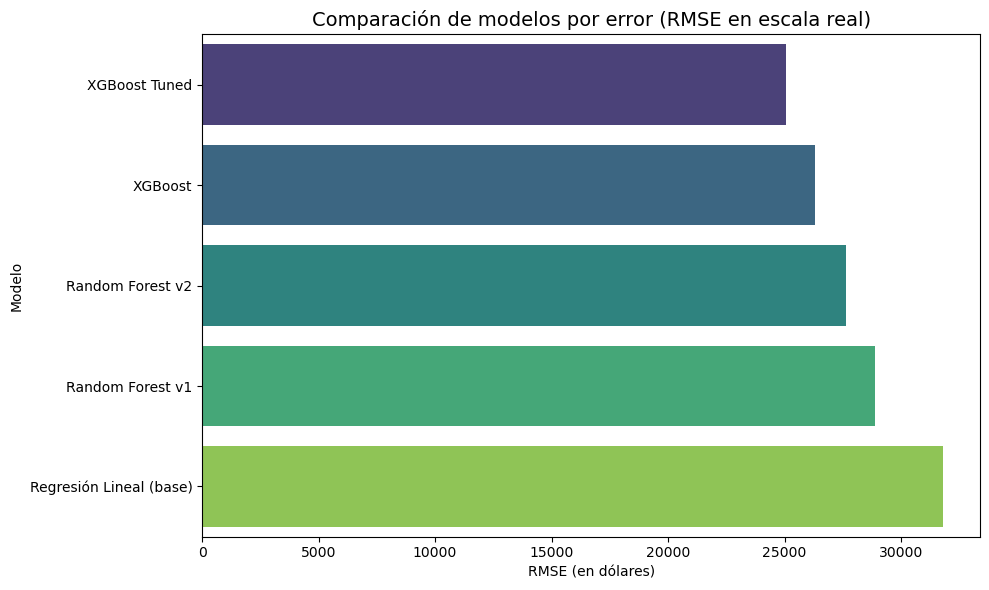

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Resultados
model_results = {
    'Modelo': [
        'Regresi√≥n Lineal (base)',
        'Random Forest v1',
        'Random Forest v2',
        'XGBoost',
        'XGBoost Tuned'
    ],
    'RMSE (log)': [
        0.1710,
        0.1568,
        0.1540,
        0.1512,
        0.1446
    ],
    'RMSE (real)': [
        31800.00,
        28889.00,
        27654.00,
        26295.00,
        25065.00
    ]
}

# 2. Creamos el DataFrame
df_resultados = pd.DataFrame(model_results)
df_resultados = df_resultados.sort_values(by='RMSE (real)', ascending=True).reset_index(drop=True)

# 3. Mostramos la tabla
display(df_resultados)

# 4. Gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x='RMSE (real)', 
    y='Modelo', 
    data=df_resultados, 
    palette='viridis'
)
plt.title('Comparaci√≥n de modelos por error (RMSE en escala real)', fontsize=14)
plt.xlabel('RMSE (en d√≥lares)')
plt.ylabel('Modelo')
plt.tight_layout()
plt.show()



In [43]:
import pandas as pd
import numpy as np

# 1. Cargar el test.csv
test_df = pd.read_csv("test.csv")

# 2. Limpieza igual que en train.csv
cols_fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure',
    'BsmtQual', 'BsmtCond'
]
for col in cols_fill_none:
    test_df[col] = test_df[col].fillna('None')

test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna('TA')
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df = test_df.fillna(0)

# 3. Variables del modelo final
num_features_v2 = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'TotRmsAbvGrd'
]
cat_features_v2 = [
    'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual',
    'GarageFinish', 'BsmtExposure', 'BsmtFinType1'
]

# 4. One-hot encoding de categ√≥ricas
X_test_cat = pd.get_dummies(test_df[cat_features_v2], drop_first=True)

# 5. Concatenar num√©ricas y categ√≥ricas
X_test = pd.concat([test_df[num_features_v2], X_test_cat], axis=1)

# 6. Alinear columnas con las usadas por best_model
modelo_cols = best_model.feature_names_in_
missing_cols = set(modelo_cols) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[modelo_cols]  # Reordenamos exactamente igual

# 7. Predecir (en log) y transformar a escala real
y_pred_log = best_model.predict(X_test)
y_pred_real = np.expm1(y_pred_log)

# 8. Crear DataFrame con predicciones y variables clave
test_df_resultado = test_df[['Id', 'OverallQual', 'GrLivArea', 'Neighborhood']].copy()
test_df_resultado['Predicted_Price'] = y_pred_real.round(2)

# 9. Mostrar primeras predicciones
print("Predicciones (primeras 10):")
display(test_df_resultado.head(10))

# 10. Exportar a CSV
test_df_resultado.to_csv('predicciones_test.csv', index=False)



Predicciones (primeras 10):


Id  OverallQual  GrLivArea Neighborhood  Predicted_Price
0  1461            5        896        NAmes    119720.507812
1  1462            6       1329        NAmes    138685.140625
2  1463            5       1629      Gilbert    171265.281250
3  1464            6       1604      Gilbert    187469.093750
4  1465            8       1280      StoneBr    194076.156250
5  1466            6       1655      Gilbert    178379.781250
6  1467            6       1187      Gilbert    168825.500000
7  1468            6       1465      Gilbert    170534.453125
8  1469            7       1341      Gilbert    191743.937500
9  1470            4        882        NAmes    117811.242188